In [ ]:
import pandas as pd 
fashion_train_df = pd.read_csv('/content/drive/MyDrive/IBM Hackchallenge 2021/Datasets/archive_Supervisedclass/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/IBM Hackchallenge 2021/Datasets/archive_Supervisedclass/fashion-mnist_test.csv', sep = ',')

In [ ]:
#Importing other required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
sns.set_style("whitegrid")

In [ ]:
#Shape of training data
fashion_train_df.shape




#Shape of test data
fashion_test_df.shape


(10000, 785)

In [ ]:
# Create training and testing arrays
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [ ]:
#Specifying class labels
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

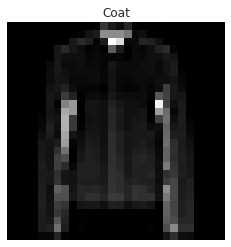

In [ ]:
#See a random image for class label verification
i = random.randint(1,60000)
plt.imshow(train[i,1:].reshape((28,28))) 

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') 
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [ ]:
#Label of the random image
label = train[i,0]
label

4.0

In [ ]:
# Prepare the training and testing dataset 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

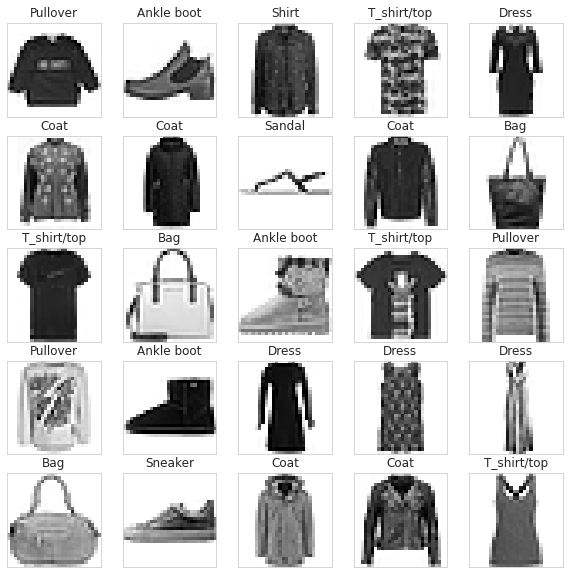

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [ ]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [ ]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(42000, 28, 28, 1)
(42000,)
(18000, 28, 28, 1)


In [ ]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [ ]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 200, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/200
83/83 [==============================] - 40s 472ms/step - loss: 1.2094 - accuracy: 0.5423 - val_loss: 0.7357 - val_accuracy: 0.7271
Epoch 2/200
83/83 [==============================] - 39s 469ms/step - loss: 0.7170 - accuracy: 0.7317 - val_loss: 0.5929 - val_accuracy: 0.7753
Epoch 3/200
83/83 [==============================] - 39s 470ms/step - loss: 0.6261 - accuracy: 0.7682 - val_loss: 0.5393 - val_accuracy: 0.7997
Epoch 4/200
83/83 [==============================] - 39s 469ms/step - loss: 0.5725 - accuracy: 0.7909 - val_loss: 0.4869 - val_accuracy: 0.8237
Epoch 5/200
83/83 [==============================] - 39s 467ms/step - loss: 0.5323 - accuracy: 0.8055 - val_loss: 0.4651 - val_accuracy: 0.8292
Epoch 6/200
83/83 [==============================] - 39s 467ms/step - loss: 0.5062 - accuracy: 0.8138 - val_loss: 0.4396 - val_accuracy: 0.8381
Epoch 7/200
83/83 [==============================] - 39s 467ms/step - loss: 0.4800 - accuracy: 0.8242 - val_loss: 0.4219 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

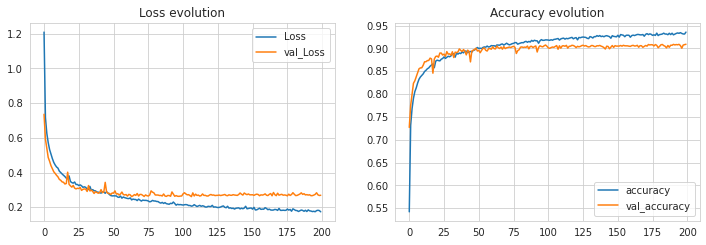

In [ ]:


#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
#SAVING THE MODEL...actually this statement would come after the evauation part.
cnn_model.save('/content/drive/MyDrive/IBM Hackchallenge 2021/FashionMNIST')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/IBM Hackchallenge 2021/FashionMNIST/assets


In [ ]:
#Comment this whole block when using it simulataneously with the model
#-------------------------------------------------------------------------------
from tensorflow import keras
import numpy as np
import pandas as pd 
fashion_train_df = pd.read_csv('/content/drive/MyDrive/IBM Hackchallenge 2021/Datasets/archive_Supervisedclass/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/IBM Hackchallenge 2021/Datasets/archive_Supervisedclass/fashion-mnist_test.csv', sep = ',')
cnn_model=keras.models.load_model('/content/drive/MyDrive/IBM Hackchallenge 2021/FashionMNIST/my_model.h5')

#Importing other required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
sns.set_style("whitegrid")

# Create training and testing arrays
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

#Specifying class labels
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prepare the training and testing dataset 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12345)
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
#--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print(X_test.shape)

(10000, 28, 28, 1)


In [ ]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)


test_img = X_test[0]
test_img=np.expand_dims(test_img, axis=0)
prediction = np.argmax(cnn_model.predict(test_img), axis=-1)
prediction[0]


np.argmax(prediction[0])


0

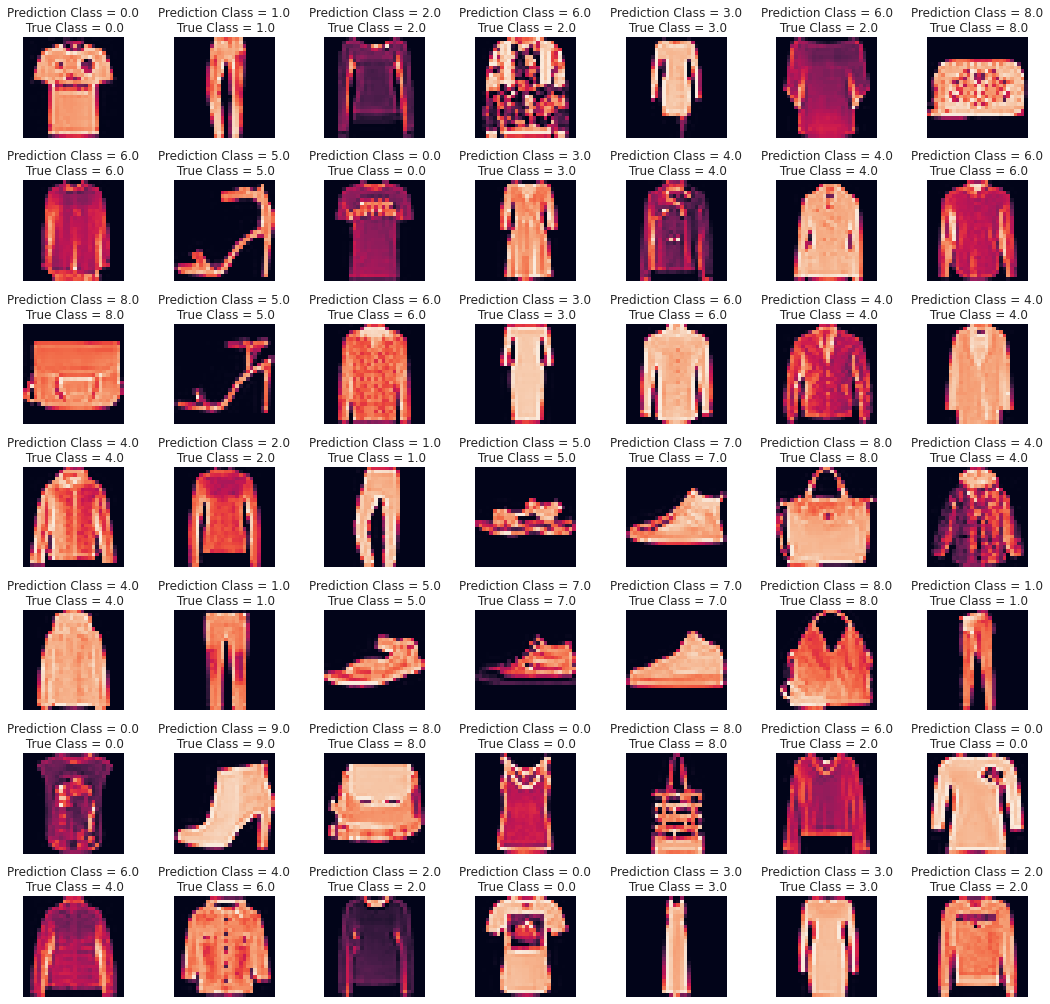

In [ ]:
#Specifying class labels
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (18,18))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    n=predicted_classes[i]
    m=y_test[i]
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    #axes[i].set_title("Prediction Class = "+ class_names[n] + "\n True Class =" + class_names[m])....I could have done it like this in java
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
#Evaluation using testing dataset and visualizing it using Confusion Matrix
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


(-0.5, 9.5, 9.5, -0.5)

<Figure size 1440x1440 with 0 Axes>

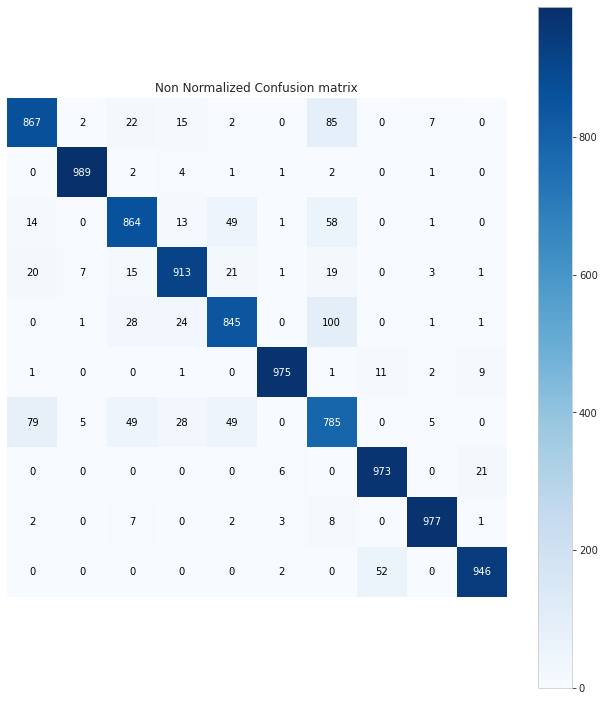

In [ ]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, title='Non Normalized Confusion matrix')
plt.axis('off')

Normalized confusion matrix


(-0.5, 9.5, 9.5, -0.5)

<Figure size 1440x1440 with 0 Axes>

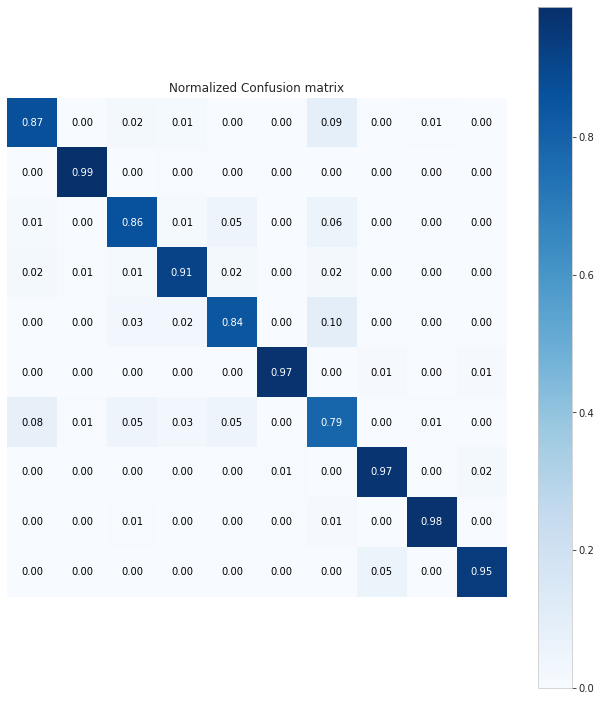

In [ ]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, normalize=True, title='Normalized Confusion matrix')
plt.axis('off')